In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
temp_df = pd.read_csv("D:\Data Mining\dataset.csv")
temp_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
temp_df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [4]:
#cheking NULL Values
temp_df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
temp_df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [6]:
temp_df.drop(temp_df[temp_df["Target"]=="Enrolled"].index,inplace=True)

In [7]:
#String to Int for the output
# Enrolled - 1, Graduate - 2, Dropout - 3

def f(s):
    if s == 'Graduate':
        return 1;
    if s == 'Dropout':
        return 2;
    
temp_df.Target = temp_df.Target.apply(f)
temp_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,2
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,2
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [8]:
temp_df.shape

(3630, 35)

In [9]:
correlation_matrix=temp_df.corr()
correlation_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,-0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,-0.122366,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,-0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,-0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,0.102795
Nationality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,0.002243,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.045833,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,-0.064195


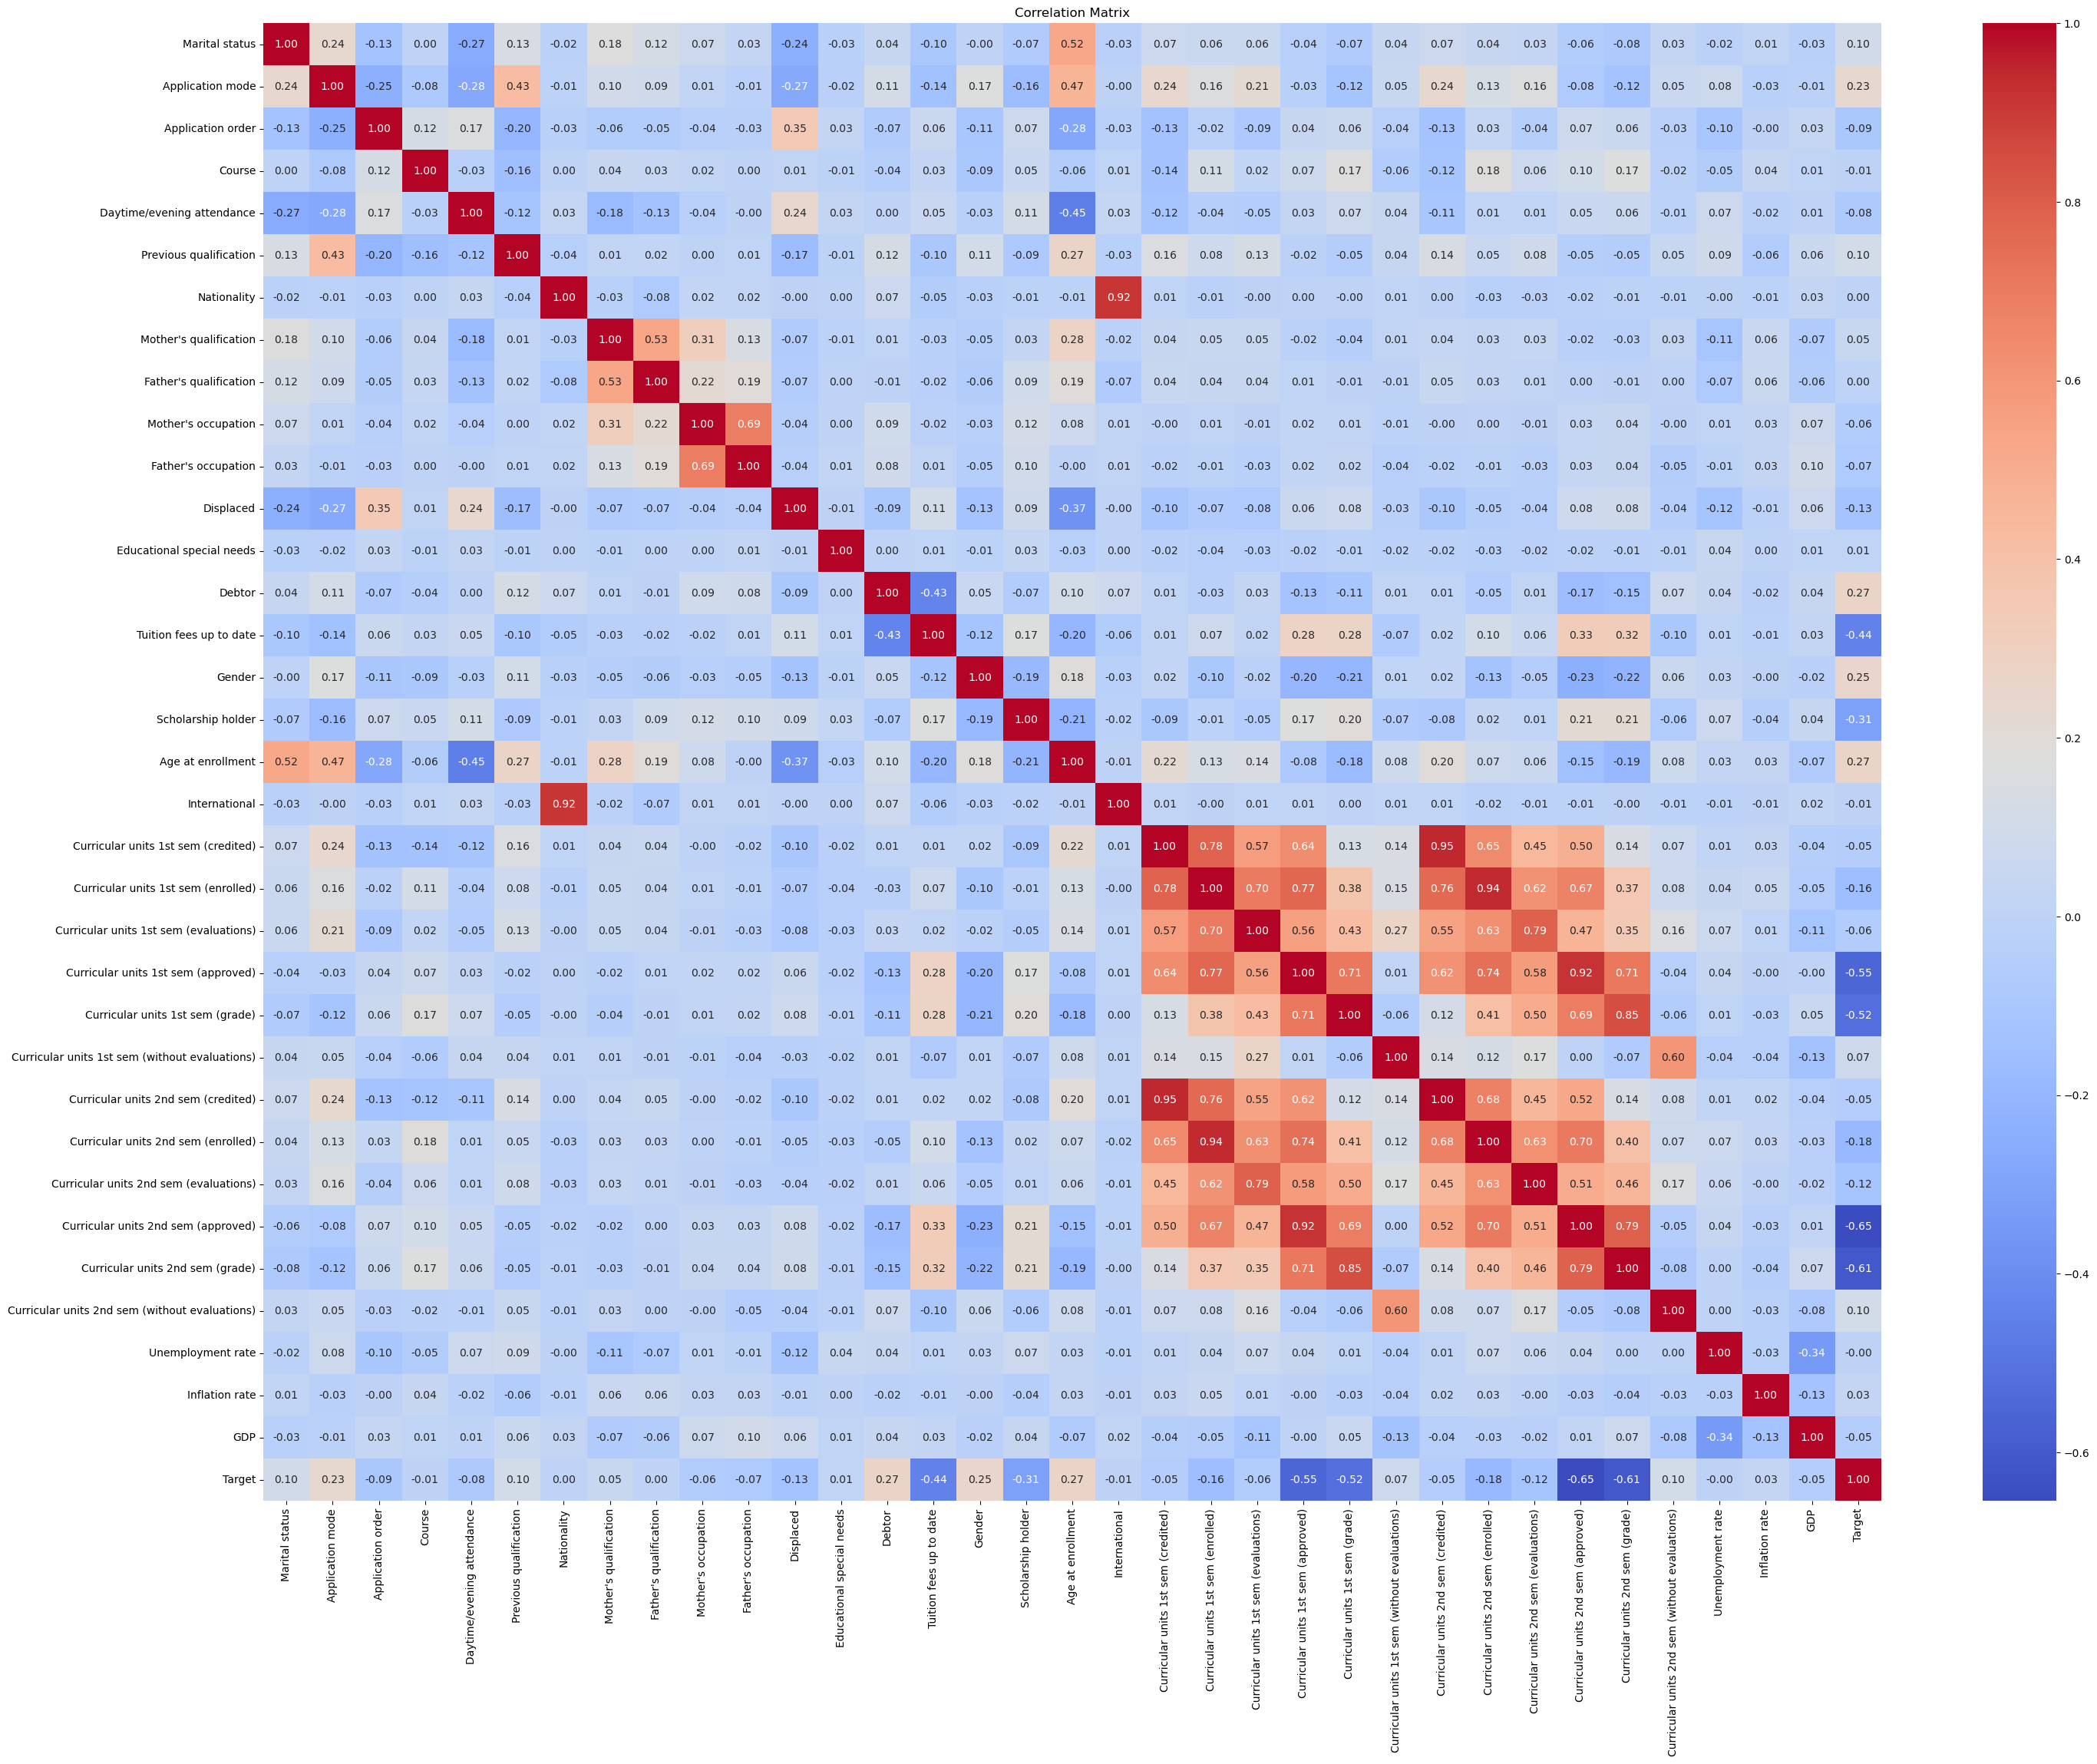

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix heatmap
plt.figure(figsize=(34, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Compute correlation with target variable
correlation_with_target = temp_df.corr()['Target']

# Select columns with correlation between -0.1 and 0.1 with the target variable
relevant_columns = correlation_with_target[(correlation_with_target < -0.2) | (correlation_with_target > 0.2)].index.tolist()

# Print relevant columns
print("Relevant Columns:", relevant_columns)

# Subset the DataFrame with relevant columns
df_relevant = temp_df[relevant_columns]




Relevant Columns: ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Target']


In [12]:
df_relevant

correlation_matrix=df_relevant.corr()
correlation_matrix


,Application mode,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
Application mode,1.000000,0.111712,-0.142187,0.170454,-0.163377,0.465425,-0.029964,-0.120509,-0.076839,-0.124287,0.233888
Debtor,0.111712,1.000000,-0.434906,0.052770,-0.065204,0.104142,-0.130204,-0.110522,-0.166305,-0.146603,0.267207
Tuition fees up to date,-0.142187,-0.434906,1.000000,-0.122231,0.169590,-0.196370,0.277787,0.275555,0.329017,0.318721,-0.442138
Gender,0.170454,0.052770,-0.122231,1.000000,-0.187994,0.179887,-0.201068,-0.207082,-0.234663,-0.219696,0.251955
Scholarship holder,-0.163377,-0.065204,0.169590,-0.187994,1.000000,-0.212588,0.168524,0.196180,0.214997,0.212342,-0.313018
Age at enrollment,0.465425,0.104142,-0.196370,0.179887,-0.212588,1.000000,-0.082984,-0.180723,-0.147668,-0.194145,0.267229
Curricular units 1st sem (approved),-0.029964,-0.130204,0.277787,-0.201068,0.168524,-0.082984,1.000000,0.710157,0.916334,0.709368,-0.554881
Curricular units 1st sem (grade),-0.120509,-0.110522,0.275555,-0.207082,0.196180,-0.180723,0.710157,1.000000,0.691907,0.845864,-0.519927
Curricular units 2nd sem (approved),-0.076839,-0.166305,0.329017,-0.234663,0.214997,-0.147668,0.916334,0.691907,1.000000,0.786838,-0.653995
Curricular units 2nd sem (grade),-0.124287,-0.146603,0.318721,-0.219696,0.212342,-0.194145,0.709368,0.845864,0.786838,1.000000,-0.605350


C:\Users\ajcha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


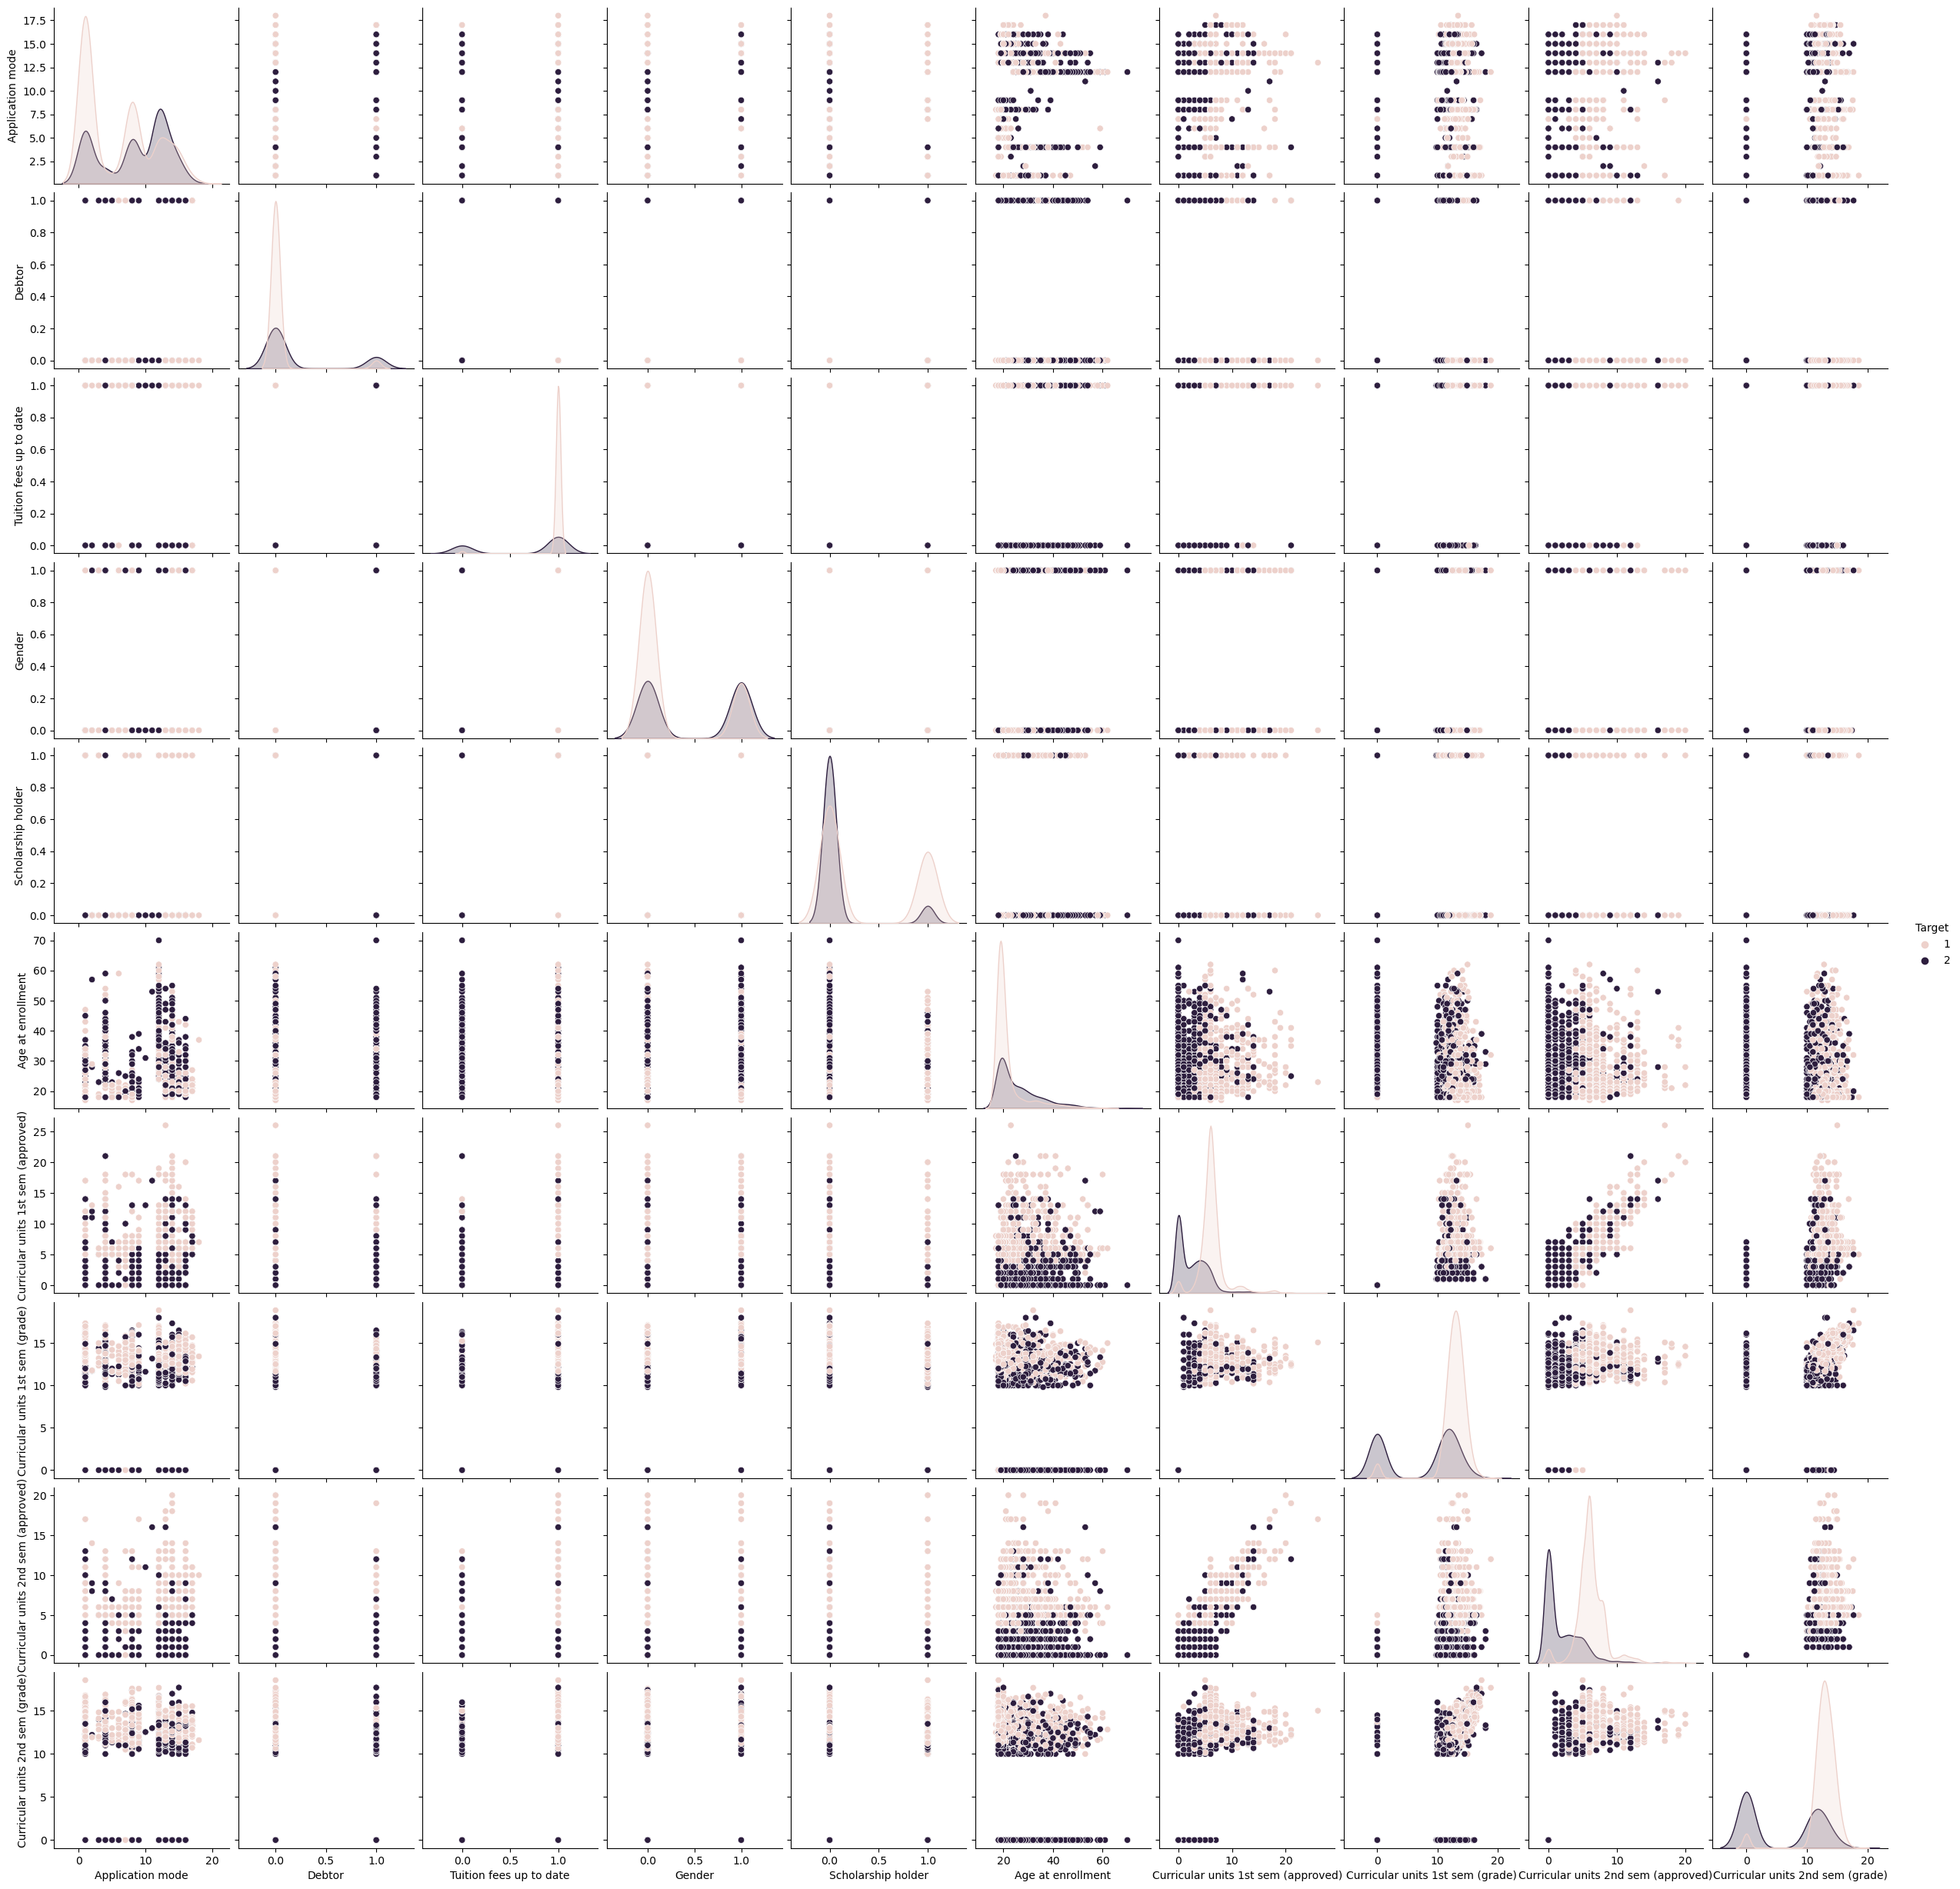

In [13]:
# ploting scatter plot in every column
sns.pairplot(df_relevant,hue='Target')

In [24]:
df_relevant.head()

,Application mode,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,8,0,1,1,0,20,0,0.000000,0,0.000000,2
1,6,0,0,1,0,19,6,14.000000,6,13.666667,1
2,1,0,0,1,0,19,0,0.000000,0,0.000000,2
3,8,0,1,0,0,20,6,13.428571,5,12.400000,1
4,12,0,1,0,0,45,5,12.333333,6,13.000000,1


In [23]:
from sklearn.neighbors import LocalOutlierFactor
outlier_columns = list(df_relevant.columns[:10])

array([<Axes: title={'center': 'Age at enrollment'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Application mode'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Debtor'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Gender'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Scholarship holder'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Tuition fees up to date'}, xlabel='[Target]'>],
      dtype=object)

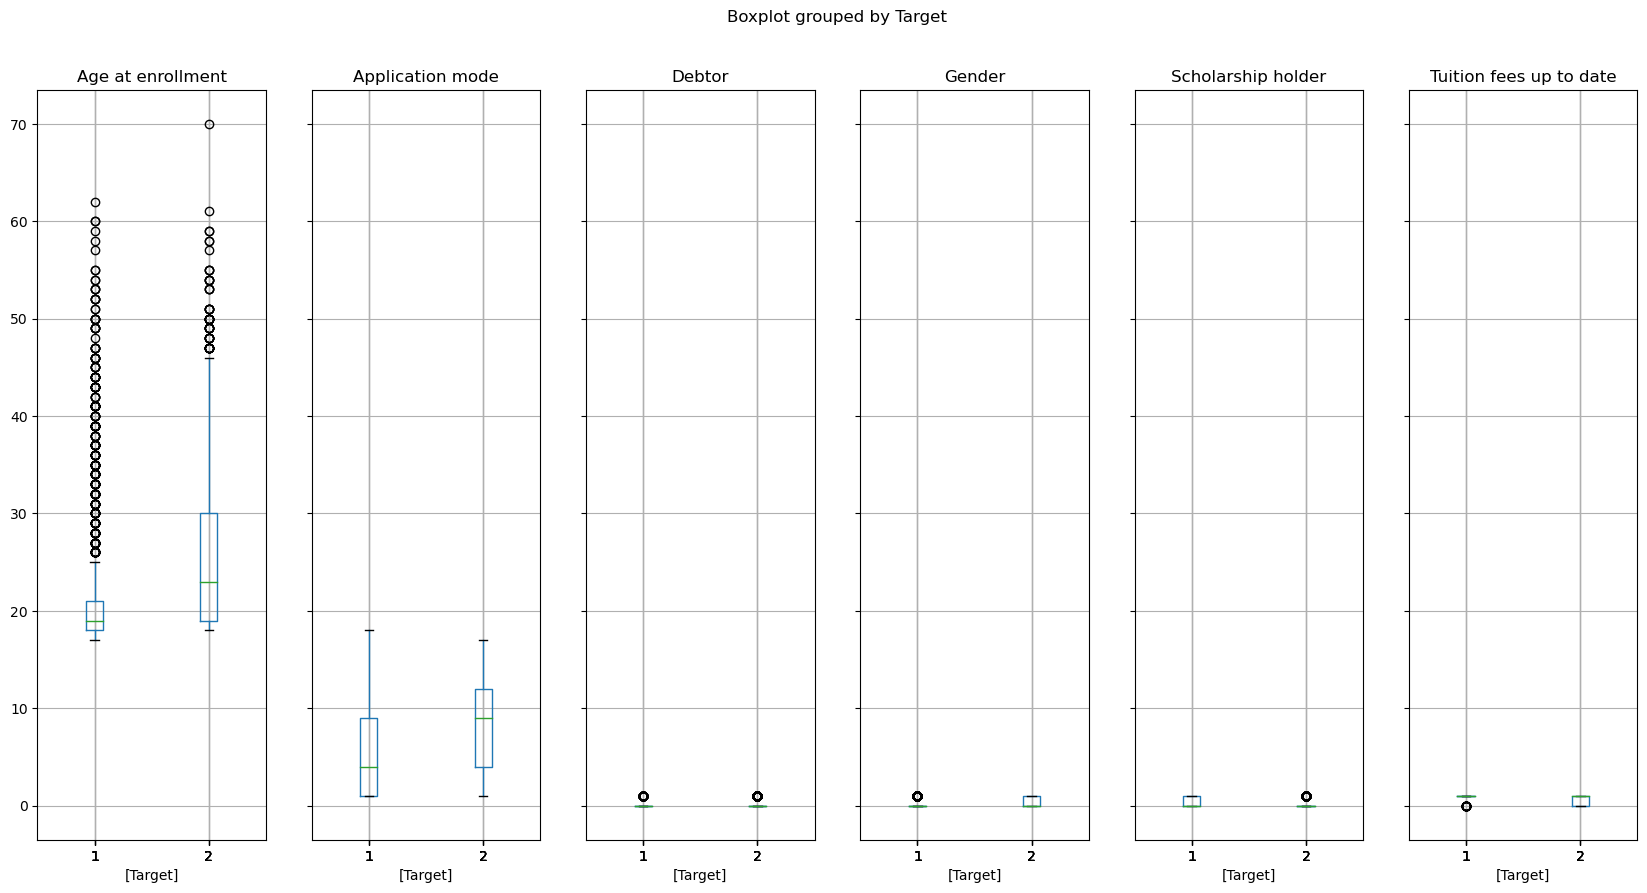

In [27]:
df_relevant[outlier_columns[:6] + ["Target"]].boxplot(by="Target", figsize=(20, 10), layout=(1, 6))

array([<Axes: title={'center': 'Curricular units 1st sem (approved)'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Curricular units 1st sem (grade)'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Curricular units 2nd sem (approved)'}, xlabel='[Target]'>,
       <Axes: title={'center': 'Curricular units 2nd sem (grade)'}, xlabel='[Target]'>],
      dtype=object)

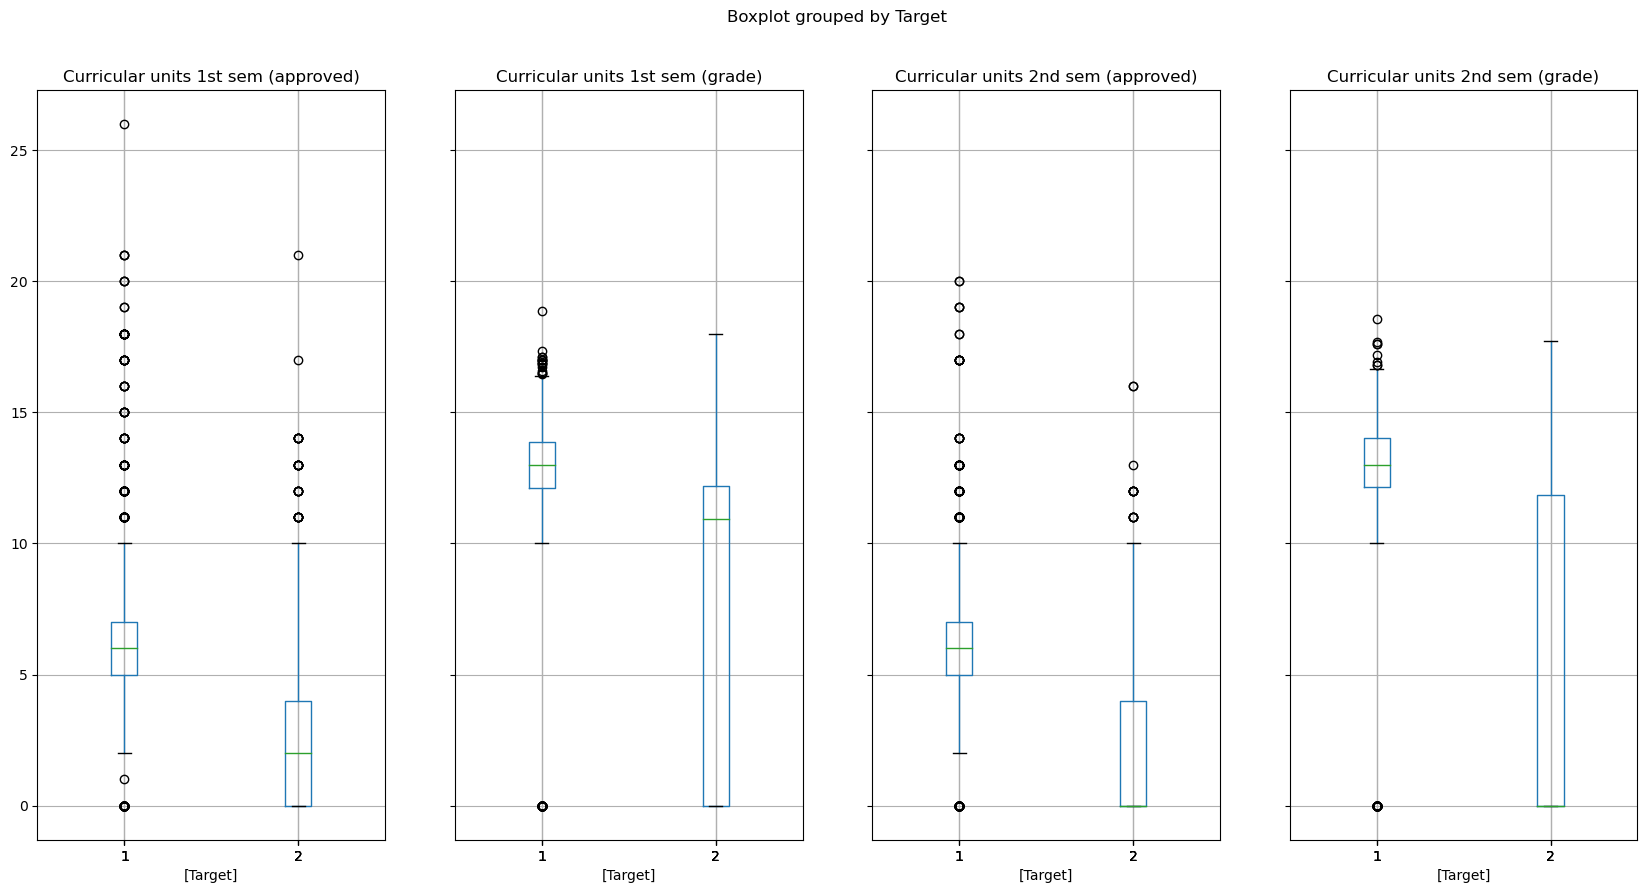

In [28]:
df_relevant[outlier_columns[6:] + ["Target"]].boxplot(by="Target", figsize=(20, 10), layout=(1, 4))

In [29]:
from scipy.stats import zscore
z_scores = zscore(df_relevant)
outliers = df_relevant[z_scores > 3]

In [30]:
df_relevant = df_relevant[(z_scores < 3)]

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_relevant = pd.DataFrame(scaler.fit_transform(df_relevant), columns=df_relevant.columns)

In [ ]:
df_

In [43]:
df_relevant.isna().sum()

Application mode                        0
Debtor                                  0
Tuition fees up to date                 0
Gender                                  0
Scholarship holder                      0
Age at enrollment                      91
Curricular units 1st sem (approved)    46
Curricular units 1st sem (grade)        0
Curricular units 2nd sem (approved)    17
Curricular units 2nd sem (grade)        0
Target                                  0
dtype: int64

In [44]:
df_relevant.isnull().sum()

Application mode                        0
Debtor                                  0
Tuition fees up to date                 0
Gender                                  0
Scholarship holder                      0
Age at enrollment                      91
Curricular units 1st sem (approved)    46
Curricular units 1st sem (grade)        0
Curricular units 2nd sem (approved)    17
Curricular units 2nd sem (grade)        0
Target                                  0
dtype: int64

In [48]:
df_relevant = df_relevant.dropna()

In [49]:
X = df_relevant.iloc[:,0:10]
Y = df_relevant.iloc[:,10]

In [50]:
X.shape, Y.shape

((3494, 10), (3494,))

In [51]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2620, 10), (874, 10), (2620,), (874,))

In [52]:
#Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000000)
logistic_regression.fit(X_train,Y_train)
logistic_regression_train_prediction = logistic_regression.predict(X_train)
logistic_regression_test_prediction = logistic_regression.predict(X_test)
cf_matrix=confusion_matrix(Y_test, logistic_regression_test_prediction)
print(cf_matrix)

[[493  26]
 [ 62 293]]


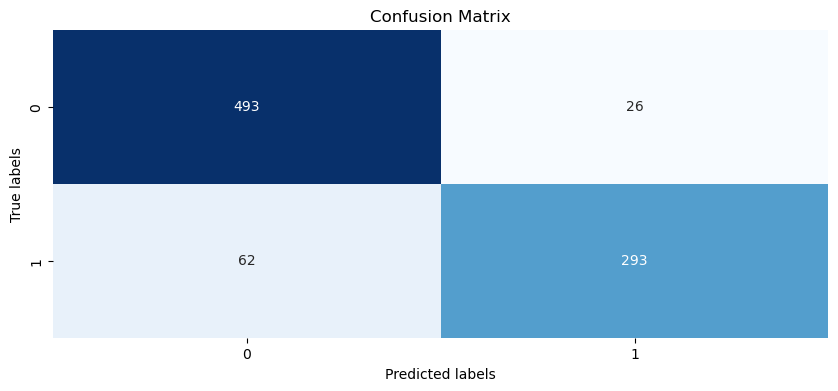

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [54]:
print(classification_report(Y_test, logistic_regression_test_prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       519
         1.0       0.92      0.83      0.87       355

    accuracy                           0.90       874
   macro avg       0.90      0.89      0.89       874
weighted avg       0.90      0.90      0.90       874



In [55]:
grid_logistic_regression = LogisticRegression(C=2, max_iter=500, solver='saga')
grid_logistic_regression.fit(X_train,Y_train)
grid_logistic_regression_train_prediction = grid_logistic_regression.predict(X_train)
grid_logistic_regression_test_prediction = grid_logistic_regression.predict(X_test)
cf_matrix=confusion_matrix(Y_test, grid_logistic_regression_test_prediction)
print(cf_matrix)

[[492  27]
 [ 60 295]]


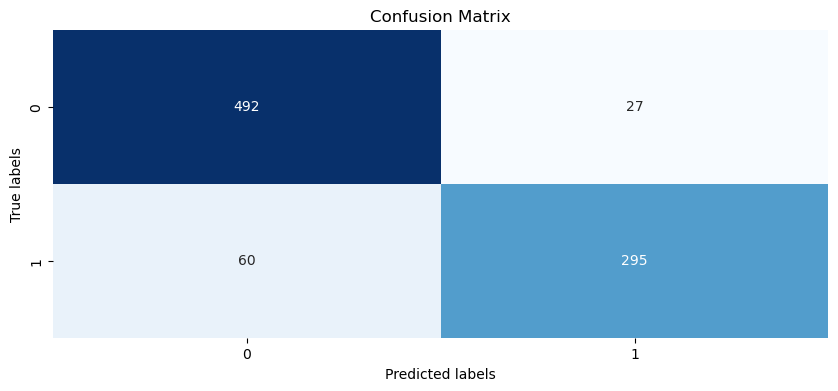

In [56]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [57]:
print(classification_report(Y_test, grid_logistic_regression_test_prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       519
         1.0       0.92      0.83      0.87       355

    accuracy                           0.90       874
   macro avg       0.90      0.89      0.90       874
weighted avg       0.90      0.90      0.90       874



In [58]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
decision_tree_train_prediction = decision_tree.predict(X_train)
decision_tree_test_prediction = decision_tree.predict(X_test)
cf_matrix=confusion_matrix(Y_test, decision_tree_test_prediction)
print(cf_matrix)

[[445  74]
 [ 77 278]]


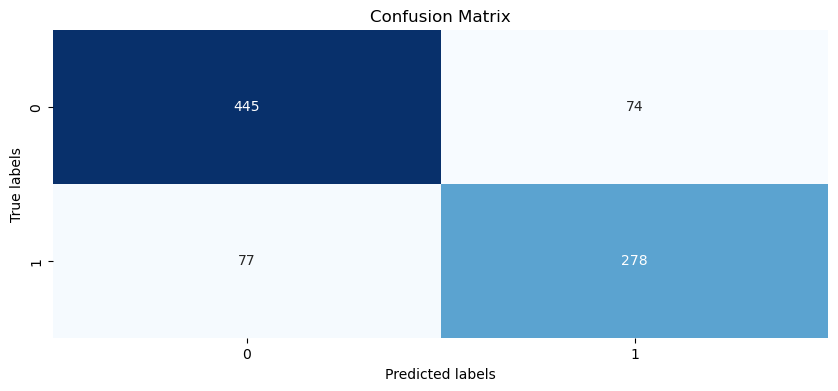

In [59]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(Y_test, decision_tree_test_prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       519
         1.0       0.79      0.78      0.79       355

    accuracy                           0.83       874
   macro avg       0.82      0.82      0.82       874
weighted avg       0.83      0.83      0.83       874



In [61]:
grid_decision_tree = DecisionTreeClassifier(max_depth=5, random_state=1024)
grid_decision_tree.fit(X_train,Y_train)
grid_decision_tree_train_prediction = grid_decision_tree.predict(X_train)
grid_decision_tree_test_prediction = grid_decision_tree.predict(X_test)
cf_matrix=confusion_matrix(Y_test, grid_decision_tree_test_prediction)
print(cf_matrix)

[[493  26]
 [ 68 287]]


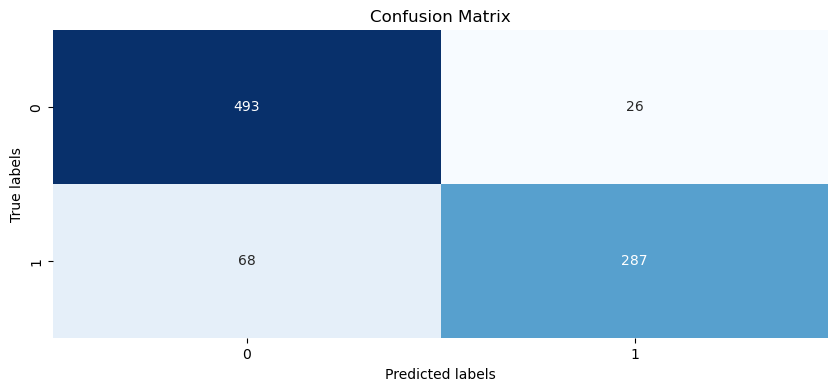

In [62]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print(classification_report(Y_test, grid_decision_tree_test_prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       519
         1.0       0.92      0.81      0.86       355

    accuracy                           0.89       874
   macro avg       0.90      0.88      0.89       874
weighted avg       0.89      0.89      0.89       874



In [64]:
#Support Vector Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train,Y_train)
svm_classifier_train_prediction = svm_classifier.predict(X_train)
svm_classifier_test_prediction = svm_classifier.predict(X_test)
cf_matrix=confusion_matrix(Y_test, svm_classifier_test_prediction)
print(cf_matrix)

[[501  18]
 [ 66 289]]


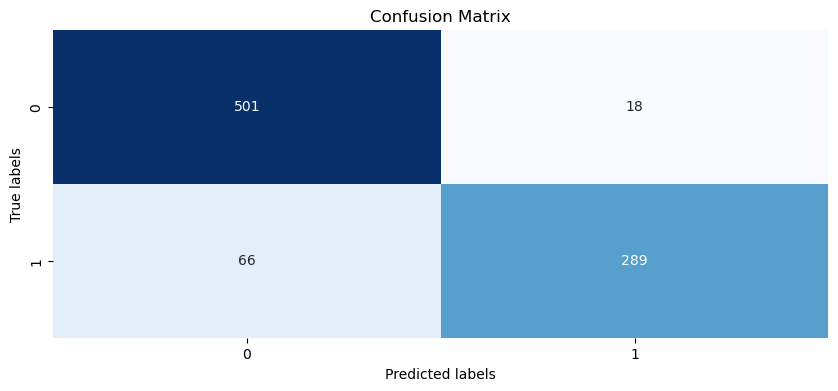

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       519
         1.0       0.94      0.81      0.87       355

    accuracy                           0.90       874
   macro avg       0.91      0.89      0.90       874
weighted avg       0.91      0.90      0.90       874



In [65]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(Y_test, svm_classifier_test_prediction))

In [66]:
#Grid Search Result
grid_svm_classifier = SVC(C=100, gamma=0.0001)
grid_svm_classifier.fit(X_train,Y_train)
grid_svm_classifier_train_prediction = grid_svm_classifier.predict(X_train)
grid_svm_classifier_test_prediction = grid_svm_classifier.predict(X_test)
cf_matrix=confusion_matrix(Y_test, grid_svm_classifier_test_prediction)
print(cf_matrix)

[[500  19]
 [104 251]]


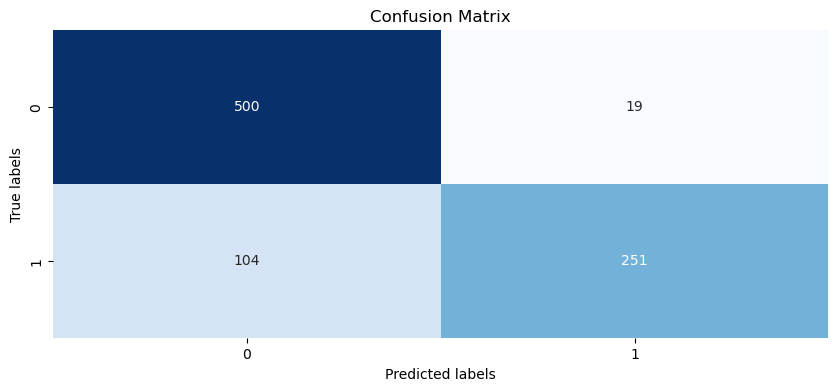

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       519
         1.0       0.93      0.71      0.80       355

    accuracy                           0.86       874
   macro avg       0.88      0.84      0.85       874
weighted avg       0.87      0.86      0.86       874



In [67]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(Y_test, grid_svm_classifier_test_prediction))

In [68]:
#Grid Search
clf = LogisticRegression()
grid = {'C' : [1,2,3,4,5] , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] , 'max_iter' : [100,300,500,700]}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5], 'max_iter': [100, 300, 500, 700],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [69]:
abc.best_estimator_

LogisticRegression(C=3, solver='liblinear')

In [70]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.777 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [71]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [72]:
grid_search_logistic_regression_train_prediction = abc.predict(X_train)
grid_search_logistic_regression_test_prediction = abc.predict(X_test)
confusion_matrix(Y_train, grid_search_logistic_regression_train_prediction), confusion_matrix(Y_test, grid_search_logistic_regression_test_prediction)

(array([[1505,  107],
        [ 211,  797]], dtype=int64),
 array([[492,  27],
        [ 60, 295]], dtype=int64))

In [73]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=True)

In [74]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=1024)

In [75]:
#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)
knn_classifier_train_prediction = knn_classifier.predict(X_train)
knn_classifier_test_prediction = knn_classifier.predict(X_test)
confusion_matrix(Y_train, knn_classifier_train_prediction), confusion_matrix(Y_test, knn_classifier_test_prediction)

(array([[1543,   69],
        [ 187,  821]], dtype=int64),
 array([[495,  24],
        [ 71, 284]], dtype=int64))

In [76]:
feature_names_arr = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nationality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Unemployment rate', 'Inflation rate', 'GDP']